Postgrado en Análisis y Predicción de Datos  
IIO - Universidad Galileo  
Marzo, 2021  
 
<H1><center> Laboratorio #5 - Visualizaciones</center></H1>

## Instrucciones
En este laboratorio debe poner en práctica sus conocimientos sobre visualizaciones y las librerías vistas en clase. Gracias al análisis de su laboratorio anterior, ha desarrolado una estrategia que desean implementar y ahora deben hacer una presentación para el CEO de la empresa. Para explicar los fundamentos de la estrategia le piden mostrar los mismos descubrimientos pero en una forma visual utilizando gráficos y así poderlos explicar más fácil. Puede utilizar cualquiera de las 3 librerias que vimos en clase para resolver este laboratorio. A lo largo de este Jupyter Notebook encontrará varias instrucciones indicando los pasos que debe realizar y los resultados esperados para completar su práctica. Debe trabajar en este mismo Notebook lo que se le solicita y luego cargar el archivo _laboratorio5_visualizaciones.ipynb_ al GES, no modifique el nombre del archivo.

In [100]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from datetime import date, datetime
import datetime

## Cargando los archivos y completando data faltante

Cree un DataFrame llamado 'data' que contenga la información de todos los archivos dentro de la carpeta 'data'. Considere que al cargar cada uno de los archivos puede tener errores en la columna _username_ , cada archivo tiene un solo valor de _username_ entonces puede rellenar los errores con el valor correspondiente de cada archivo.
La columna _upload_date_ indica la fecha en que el _post_ fué publicado. Convierta el campo *upload_data* a *date_time*.  Puede utilizar el método to_datetime() de pandas.
Utilice esta columna para descartar los datos del 25 de diciembre 2020 en adelante.

*Estos pasos ya los realizó en su laboratorio anterior, puede copiarlos*

In [101]:
#lea todos los archivos dentro de la carpeta data, luego cree un DataFrame consolidado llamado data
files = [file for file in os.listdir("./data")]
data = pd.DataFrame()
data1 = pd.DataFrame()
files

['buthewestie.txt',
 'dechuchos.txt',
 'guatemalapetfriendly.txt',
 'potter_cm.txt',
 'viajaconorus.txt']

In [102]:
for file in files:
    df = pd.read_csv("./data/" + file, sep = "|")
    data1 = pd.concat([data1, df])

In [150]:
data = data1
data.head()

,Unnamed: 0,csrf_token,viewer,viewer_id,country_code,language_code,locale,device_id,browser_push_pub_key,key_id,...,viewer_has_saved_to_collection,viewer_in_photo_of_you,viewer_can_reshare,video_url,has_audio,video_view_count,username,full_name,upload_date,hashtags
0,0,D6iS7WnSFbhB9ZUFt5nWK51xdDegcZ6V,NaN,NaN,GT,en,en_US,D4425F91-940E-4EE7-8FAA-4E1AAA1A8B58,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-21 09:22:24,[]
1,1,n9cW3xMiT311ZhtAfXYnEYO9dRBGkbhE,NaN,NaN,GT,en,en_US,D4EBBE02-4EF2-46E4-ACA7-4F8908A0C0AF,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-20 09:32:18,[]
2,2,Y5WDcpqc8y0rsED1yI8YciJSgEqLJ9bT,NaN,NaN,GT,en,en_US,251B69CB-92EE-4D3A-B536-72AD356D98D8,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-16 09:28:28,['dogapproved']
3,3,5vFgXtmB2ihqowxoeLeVKvWA8UrpxAsa,NaN,NaN,GT,en,en_US,A0334128-ADCC-4A0F-8FD9-F27024D2BC57,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-13 14:57:03,"['OliyBu', 'ThiagoyBu', 'OliThiagoyBu']"
4,4,F4ejlkqj0IhfwjCDxNAdffQCjBci05NN,NaN,NaN,GT,en,en_US,4C162E02-7158-4F01-AE88-7A3FC33167EE,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-07 11:44:15,"['christmaspresent', 'bestchristmaspresent', '..."


In [104]:
col = ["username"]
data.loc[:,col] = data.loc[:, col].ffill()

In [105]:
data['upload_date'] = pd.to_datetime(data['upload_date'])
data = data[ data["upload_date"] < '2020-12-25']
data.head()

,Unnamed: 0,csrf_token,viewer,viewer_id,country_code,language_code,locale,device_id,browser_push_pub_key,key_id,...,viewer_has_saved_to_collection,viewer_in_photo_of_you,viewer_can_reshare,video_url,has_audio,video_view_count,username,full_name,upload_date,hashtags
0,0,D6iS7WnSFbhB9ZUFt5nWK51xdDegcZ6V,NaN,NaN,GT,en,en_US,D4425F91-940E-4EE7-8FAA-4E1AAA1A8B58,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-21 09:22:24,[]
1,1,n9cW3xMiT311ZhtAfXYnEYO9dRBGkbhE,NaN,NaN,GT,en,en_US,D4EBBE02-4EF2-46E4-ACA7-4F8908A0C0AF,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-20 09:32:18,[]
2,2,Y5WDcpqc8y0rsED1yI8YciJSgEqLJ9bT,NaN,NaN,GT,en,en_US,251B69CB-92EE-4D3A-B536-72AD356D98D8,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-16 09:28:28,['dogapproved']
3,3,5vFgXtmB2ihqowxoeLeVKvWA8UrpxAsa,NaN,NaN,GT,en,en_US,A0334128-ADCC-4A0F-8FD9-F27024D2BC57,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-13 14:57:03,"['OliyBu', 'ThiagoyBu', 'OliThiagoyBu']"
4,4,F4ejlkqj0IhfwjCDxNAdffQCjBci05NN,NaN,NaN,GT,en,en_US,4C162E02-7158-4F01-AE88-7A3FC33167EE,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-07 11:44:15,"['christmaspresent', 'bestchristmaspresent', '..."


## Cuál es la cuenta con mas publicaciones?
El campo _id_ es un identificador único para cada _post_ . Utilizando groupby() cree una tabla mostrando la cantidad de _posts_ para cada _username_.  Muestre una gráfica de barras donde el eje x sea el nombre de la cuenta y el eje y (altura) sea la cantidad de publicaciones.

In [106]:
publi_mas = data.groupby(["username"])["id"].count()

In [107]:
px.bar(x=publi_mas.index, y=publi_mas, text= publi_mas, title="Publicaciones por cuenta")

## Tendencia de publicaciones para la cuenta con el mayor  número de publicaciones

La cuenta _buthewestie_ es la cuenta con la mayor cantidad de publicaciones. Utilice un gráfico de líneas para mostrar la tendencia de la cantidad de publicaciones por *día*. La gráfica debe tener la fecha de publicación en el eje x y la cantidad de publicaciones en el eje y. Recuerde quitar la parte de hora a la fecha.

In [108]:
buthewestie_df = data[(data.username=="buthewestie")]
buthewestie_df["upload_date"] = buthewestie_df["upload_date"].dt.date
buthewestie_date = buthewestie_df.groupby(["upload_date"])["id"].count()

<ipython-input-108-f605467b0a52>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
px.bar(x=buthewestie_date.index, y=buthewestie_date, text= buthewestie_date, title = "Publicaciones por día buthewestie")

La tendencia por día no dice mucho porque es raro el día en que hace más de una pulicación. Realice una gráfica de cantidad de posts por año/mes y vea si el resultado da un resultado. 

Tips: 
* Investigue sobre strftime() https://www.programiz.com/python-programming/datetime/strftime
* https://stackoverflow.com/questions/51105648/ordering-and-formatting-dates-on-x-axis-in-seaborn-bar-plot
* set_xticklabels() le ayuda a cambiar la orientacion de las etiquetas del eje x para que no se sobrepongan https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html


In [110]:
buthewestie_df1 = data[(data.username=="buthewestie")]
buthewestie_df1["period"] = buthewestie_df1["upload_date"].dt.strftime("%y-%m")
buthewestie_df1.head()

<ipython-input-110-832495872847>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,csrf_token,viewer,viewer_id,country_code,language_code,locale,device_id,browser_push_pub_key,key_id,...,viewer_in_photo_of_you,viewer_can_reshare,video_url,has_audio,video_view_count,username,full_name,upload_date,hashtags,period
0,0,D6iS7WnSFbhB9ZUFt5nWK51xdDegcZ6V,NaN,NaN,GT,en,en_US,D4425F91-940E-4EE7-8FAA-4E1AAA1A8B58,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-21 09:22:24,[],20-12
1,1,n9cW3xMiT311ZhtAfXYnEYO9dRBGkbhE,NaN,NaN,GT,en,en_US,D4EBBE02-4EF2-46E4-ACA7-4F8908A0C0AF,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-20 09:32:18,[],20-12
2,2,Y5WDcpqc8y0rsED1yI8YciJSgEqLJ9bT,NaN,NaN,GT,en,en_US,251B69CB-92EE-4D3A-B536-72AD356D98D8,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-16 09:28:28,['dogapproved'],20-12
3,3,5vFgXtmB2ihqowxoeLeVKvWA8UrpxAsa,NaN,NaN,GT,en,en_US,A0334128-ADCC-4A0F-8FD9-F27024D2BC57,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-13 14:57:03,"['OliyBu', 'ThiagoyBu', 'OliThiagoyBu']",20-12
4,4,F4ejlkqj0IhfwjCDxNAdffQCjBci05NN,NaN,NaN,GT,en,en_US,4C162E02-7158-4F01-AE88-7A3FC33167EE,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,False,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-07 11:44:15,"['christmaspresent', 'bestchristmaspresent', '...",20-12


In [111]:
buthewestie_period = buthewestie_df1.groupby(["period"])["id"].count()
buthewestie_period

period
15-11    19
15-12    19
16-01    22
16-02    29
16-03    22
         ..
20-08     3
20-09     1
20-10     4
20-11     3
20-12     6
Name: id, Length: 61, dtype: int64

In [112]:
periodo = px.bar(x=buthewestie_period.index, y=buthewestie_period, text= buthewestie_period, title = "Publicaciones por mes y año buthewestie", orientation="v")
periodo.update_traces(texttemplate='%{text:.1s}', textposition='outside')
periodo.update_layout(uniformtext_minsize=1, uniformtext_mode='hide')
periodo.show()

## Scatterplot de likes vs. comentarios

Realice un scatterplot con la cantidad de likes en el eje x y la cantidad de comentarios en el eje x. Cada punto representa un post. Continue utilizando solo los posts de buthewestie.

Text(0.5, 1.0, 'Scatter plot comments vs likes Buthewestie')

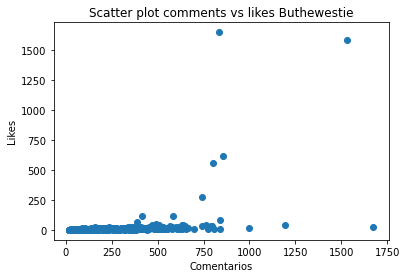

In [113]:
plt.scatter(x=buthewestie_df1["likes"], y = buthewestie_df1["comments"])
plt.xlabel("Comentarios")
plt.ylabel("Likes")
plt.title("Scatter plot comments vs likes Buthewestie")

Parece que los giveaway nos estan afectando la visualización. La columna [caption] es la descripción que le pusieron al post y nos puede ayudar a idenfiticar si el post es un giveaway. Cree una nueva columna que tenga valores true cuando la columna caption contenga el texto 'GIVEAWAY', asegurese de considerar todas las variantes en mayúsculas, minúsculas, alternando, etc. Utilice esta nueva columna para asignar color a los puntos en la gráfica y así identificar si los giveaway son los post con mas comentarios.

Recuerde que pandas es su mejor amigo para estos temas, lea sobre *contains()*. Ponga atención al parámetro *case*

In [114]:
giveaway = '^(g|G)(i|I)(v|V)(e|E)(a|A)(w|W)(a|A)(y|Y)$'
buthewestie_df1["giveaway"] = buthewestie_df1["caption"].str.contains('giveaway', case = False, regex = None)
buthewestie_df1


<ipython-input-114-e290ced0e7f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,csrf_token,viewer,viewer_id,country_code,language_code,locale,device_id,browser_push_pub_key,key_id,...,viewer_can_reshare,video_url,has_audio,video_view_count,username,full_name,upload_date,hashtags,period,giveaway
0,0,D6iS7WnSFbhB9ZUFt5nWK51xdDegcZ6V,NaN,NaN,GT,en,en_US,D4425F91-940E-4EE7-8FAA-4E1AAA1A8B58,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-21 09:22:24,[],20-12,False
1,1,n9cW3xMiT311ZhtAfXYnEYO9dRBGkbhE,NaN,NaN,GT,en,en_US,D4EBBE02-4EF2-46E4-ACA7-4F8908A0C0AF,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-20 09:32:18,[],20-12,False
2,2,Y5WDcpqc8y0rsED1yI8YciJSgEqLJ9bT,NaN,NaN,GT,en,en_US,251B69CB-92EE-4D3A-B536-72AD356D98D8,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-16 09:28:28,['dogapproved'],20-12,False
3,3,5vFgXtmB2ihqowxoeLeVKvWA8UrpxAsa,NaN,NaN,GT,en,en_US,A0334128-ADCC-4A0F-8FD9-F27024D2BC57,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-13 14:57:03,"['OliyBu', 'ThiagoyBu', 'OliThiagoyBu']",20-12,False
4,4,F4ejlkqj0IhfwjCDxNAdffQCjBci05NN,NaN,NaN,GT,en,en_US,4C162E02-7158-4F01-AE88-7A3FC33167EE,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2020-12-07 11:44:15,"['christmaspresent', 'bestchristmaspresent', '...",20-12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,606,lLQgEa78j6QFwhq717s8BU1FL8usguHp,NaN,NaN,GT,en,en_US,D22DA205-3C77-4C2F-98CD-92B7BC36AA82,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2015-11-07 23:28:45,"['home', 'homesweethome', 'sleeping', 'instada...",15-11,False
607,607,vi3biCcNLaTQrifbEdcEtP5yMkwBYU5o,NaN,NaN,GT,en,en_US,CCFD5672-0336-4B1E-A1B0-E86D8E80B71D,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2015-11-07 13:47:59,"['home', 'homesweethome', 'ball', 'instadaily'...",15-11,False
608,608,tY75MYuS1MdDv7naOD8EfG4jBr4yiZHl,NaN,NaN,GT,en,en_US,7C5217A9-B98B-4B91-92C5-C6DFB65E8F4A,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2015-11-05 19:29:54,"['home', 'homesweethome', 'sleeping', 'instada...",15-11,False
609,609,yRJV07BScJ1McXfo5ooyDn9edtfSyVSv,NaN,NaN,GT,en,en_US,5355A009-18D9-4564-B015-383C4C97E056,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,True,NaN,NaN,NaN,buthewestie,Bu the Westie,2015-11-04 21:30:26,"['home', 'homesweethome', 'sleeping', 'instada...",15-11,False


Text(0.5, 1.0, 'Scatter plot comments vs likes Buthewestie')

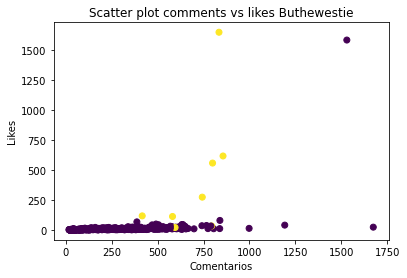

In [115]:
plt.scatter(x=buthewestie_df1["likes"], y = buthewestie_df1["comments"], c = buthewestie_df1["giveaway"])
plt.xlabel("Comentarios")
plt.ylabel("Likes")
plt.title("Scatter plot comments vs likes Buthewestie")

En efecto, los giveaway son los post que estan sesgando los datos. Una forma de eliminar estos valores atípicos sería calcular las desviaciones estándar, pero nosotros lo haremos más sencillo y aplicaremos un filtro para eliminar todos los post con más de 100 comentarios. Luego de esto repita la gráfica. 

In [151]:
buthewestie_df1 =  buthewestie_df1[(buthewestie_df1.comments <100)]
buthewestie_df1.head()

,Unnamed: 0,csrf_token,viewer,viewer_id,country_code,language_code,locale,device_id,browser_push_pub_key,key_id,...,has_audio,video_view_count,username,full_name,upload_date,hashtags,period,giveaway,weekday,hora
0,0,D6iS7WnSFbhB9ZUFt5nWK51xdDegcZ6V,NaN,NaN,GT,en,en_US,D4425F91-940E-4EE7-8FAA-4E1AAA1A8B58,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,NaN,NaN,buthewestie,Bu the Westie,2020-12-21 09:22:24,[],20-12,False,0,9
1,1,n9cW3xMiT311ZhtAfXYnEYO9dRBGkbhE,NaN,NaN,GT,en,en_US,D4EBBE02-4EF2-46E4-ACA7-4F8908A0C0AF,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,NaN,NaN,buthewestie,Bu the Westie,2020-12-20 09:32:18,[],20-12,False,6,9
2,2,Y5WDcpqc8y0rsED1yI8YciJSgEqLJ9bT,NaN,NaN,GT,en,en_US,251B69CB-92EE-4D3A-B536-72AD356D98D8,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,NaN,NaN,buthewestie,Bu the Westie,2020-12-16 09:28:28,['dogapproved'],20-12,False,2,9
3,3,5vFgXtmB2ihqowxoeLeVKvWA8UrpxAsa,NaN,NaN,GT,en,en_US,A0334128-ADCC-4A0F-8FD9-F27024D2BC57,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,NaN,NaN,buthewestie,Bu the Westie,2020-12-13 14:57:03,"['OliyBu', 'ThiagoyBu', 'OliThiagoyBu']",20-12,False,6,14
4,4,F4ejlkqj0IhfwjCDxNAdffQCjBci05NN,NaN,NaN,GT,en,en_US,4C162E02-7158-4F01-AE88-7A3FC33167EE,BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjF...,88,...,NaN,NaN,buthewestie,Bu the Westie,2020-12-07 11:44:15,"['christmaspresent', 'bestchristmaspresent', '...",20-12,False,0,11


Text(0.5, 1.0, 'Scatter plot comments vs likes Buthewestie')

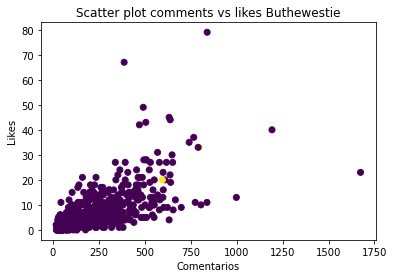

In [117]:
plt.scatter(x=buthewestie_df1["likes"], y = buthewestie_df1["comments"], c = buthewestie_df1["giveaway"])
plt.xlabel("Comentarios")
plt.ylabel("Likes")
plt.title("Scatter plot comments vs likes Buthewestie")

## Mapa de calor por horas del día

Exisitirá una combinación de hora del día y día de la semana que sea mejor para maximizar la cantidad de likes? 

### Ejemplo

Este mapa de calor utiliza una dataset llamada *heatmap.csv*. La columna *cost* representa el costo de la plataforma en la fecha indicada. La columna *flag* tiene un 1 si el costo es mayor que 0.

In [119]:
df = pd.read_csv('heatmap.csv')
df.head()

,date,platform,cost,flag
0,3/1/2021,Google,511.975395,1
1,3/2/2021,Google,586.273582,1
2,3/3/2021,Google,11.186823,1
3,3/4/2021,Google,449.370816,1
4,3/5/2021,Google,908.432428,1


En este ejemplo utilizamos la columna *flag* y veremos en amarillo los días en que no tenemos costo. Podemos utilizar esto como un método para validar que los datos estén correctos. 

<AxesSubplot:xlabel='date', ylabel='platform'>

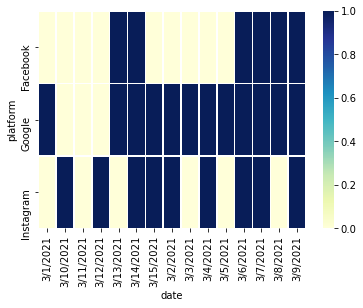

In [120]:
test = df.pivot("platform", "date", "flag") 
sns.heatmap(test, linewidths=.5,cmap="YlGnBu")

Podemos usar la columna costo y la escala de color nos ayudará a visualizar los días y plataformas con mayores o menores costos. Mientras mas azul, mayor es el costo.

<AxesSubplot:xlabel='date', ylabel='platform'>

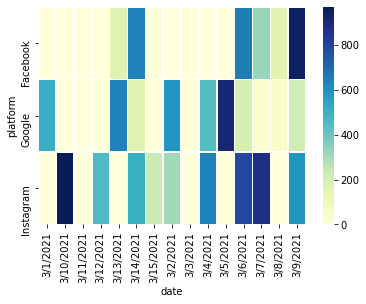

In [121]:
test = df.pivot("platform", "date", "cost") 
sns.heatmap(test, linewidths=.5,cmap="YlGnBu")

Basándose en el ejemplo anterior construya un mapa de calor con el día de la semana en el eje x y la hora del día en el eje y. Utilice solo los datos de buthewestie.

In [123]:
buthewestie_df1["weekday"] = buthewestie_df1["upload_date"].dt.weekday
buthewestie_df1["hora"] = buthewestie_df1["upload_date"].dt.hour

<ipython-input-123-8c4dfd4b8671>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-8c4dfd4b8671>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
prueba = buthewestie_df1.pivot_table(index = "hora", columns = "weekday" , values="likes", aggfunc = "sum")

<AxesSubplot:xlabel='weekday', ylabel='hora'>

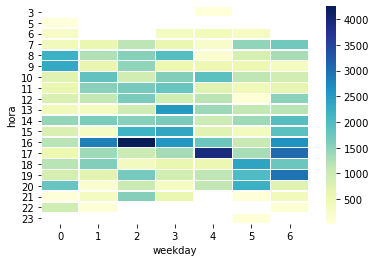

In [149]:
sns.heatmap(prueba, linewidths=.5,cmap="YlGnBu")

#### Las horas en las que se consiguen más likes por publicación son las 16 horas, generalmente los días martes y jueves.